In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# make a plot outputs appear and be stored within the notebook
%matplotlib inline

print("Import Complete!")


Import Complete!


In [2]:
df_train = pd.read_csv('./kddcup.data.corrected', header=None)
df_train.columns = ["duration",
"protocol_type",
"service",
"flag",
"src_bytes",
"dst_bytes",
"land",
"wrong_fragment",
"urgent",
"hot",
"num_failed_logins",
"logged_in",
"num_compromised",
"root_shell",
"su_attempted",
"num_root",
"num_file_creations",
"num_shells",
"num_access_files",
"num_outbound_cmds",
"is_host_login",
"is_guest_login",
"count",
"srv_count",
"serror_rate",
"srv_serror_rate",
"rerror_rate",
"srv_rerror_rate",
"same_srv_rate",
"diff_srv_rate",
"srv_diff_host_rate",
"dst_host_count",
"dst_host_srv_count",
"dst_host_same_srv_rate",
"dst_host_diff_srv_rate",
"dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate",
"dst_host_serror_rate",
"dst_host_srv_serror_rate",
"dst_host_rerror_rate",
"dst_host_srv_rerror_rate",
"target"]

In [3]:
df_test = pd.read_csv('./kddcup.data_10_percent_corrected', header=None)
df_test.columns = ["duration",
"protocol_type",
"service",
"flag",
"src_bytes",
"dst_bytes",
"land",
"wrong_fragment",
"urgent",
"hot",
"num_failed_logins",
"logged_in",
"num_compromised",
"root_shell",
"su_attempted",
"num_root",
"num_file_creations",
"num_shells",
"num_access_files",
"num_outbound_cmds",
"is_host_login",
"is_guest_login",
"count",
"srv_count",
"serror_rate",
"srv_serror_rate",
"rerror_rate",
"srv_rerror_rate",
"same_srv_rate",
"diff_srv_rate",
"srv_diff_host_rate",
"dst_host_count",
"dst_host_srv_count",
"dst_host_same_srv_rate",
"dst_host_diff_srv_rate",
"dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate",
"dst_host_serror_rate",
"dst_host_srv_serror_rate",
"dst_host_rerror_rate",
"dst_host_srv_rerror_rate",
"target"]

<h2>Get a look on the datasets</h2>

In [4]:
df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,tcp,http,SF,212,2288,0,0,0,0,...,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.
4898427,0,tcp,http,SF,219,236,0,0,0,0,...,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.
4898428,0,tcp,http,SF,218,3610,0,0,0,0,...,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.
4898429,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells                   int64  
 18  num_access_files             int64  
 19  

In [6]:
df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

<h2>Get unique values from symbolic columns</h2>

In [20]:
print(f"protocol_type: {df_train['protocol_type'].unique()}\n\n service: {df_train['service'].unique()}\n\n flag: {df_train['flag'].unique()}\n\n target: {df_train['target'].unique()}")

protocol_type: ['tcp' 'udp' 'icmp']

 service: ['http' 'smtp' 'domain_u' 'auth' 'finger' 'telnet' 'eco_i' 'ftp' 'ntp_u'
 'ecr_i' 'other' 'urp_i' 'private' 'pop_3' 'ftp_data' 'netstat' 'daytime'
 'ssh' 'echo' 'time' 'name' 'whois' 'domain' 'mtp' 'gopher' 'remote_job'
 'rje' 'ctf' 'supdup' 'link' 'systat' 'discard' 'X11' 'shell' 'login'
 'imap4' 'nntp' 'uucp' 'pm_dump' 'IRC' 'Z39_50' 'netbios_dgm' 'ldap'
 'sunrpc' 'courier' 'exec' 'bgp' 'csnet_ns' 'http_443' 'klogin' 'printer'
 'netbios_ssn' 'pop_2' 'nnsp' 'efs' 'hostnames' 'uucp_path' 'sql_net'
 'vmnet' 'iso_tsap' 'netbios_ns' 'kshell' 'urh_i' 'http_2784' 'harvest'
 'aol' 'tftp_u' 'http_8001' 'tim_i' 'red_i']

 flag: ['SF' 'S2' 'S1' 'S3' 'OTH' 'REJ' 'RSTO' 'S0' 'RSTR' 'RSTOS0' 'SH']

 target: ['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'roo

In [24]:
df_train['target'].value_counts()

smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: target, dtype: int64

In [25]:
df_test['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

<h2>Count missing values</h2>

In [8]:
df_train.isna().sum().sort_values(ascending=False) # count missing values

duration                       0
dst_host_count                 0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_srv_count             0
protocol_type                  0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
dst_host_rerror_rate           0
dst_host_srv_rerror_rate       0
count                          0
is_guest_login                 0
is_host_login                  0
num_outbound_cmds              0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent    

In [9]:
df_test.isna().sum().sort_values(ascending=False) # count missing values

duration                       0
dst_host_count                 0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_srv_count             0
protocol_type                  0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
dst_host_rerror_rate           0
dst_host_srv_rerror_rate       0
count                          0
is_guest_login                 0
is_host_login                  0
num_outbound_cmds              0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent    

In [21]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [23]:
#Adding Attack Type column
df_train['Attack Type'] = df_train.target.apply(lambda r:attacks_types[r[:-1]])
df_test['Attack Type'] = df_test.target.apply(lambda r:attacks_types[r[:-1]])

df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [27]:
#Finding categorical features
num_cols = df_train._get_numeric_data().columns

cate_cols = list(set(df_train.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['flag', 'protocol_type', 'service']

In [28]:
def plot_bar_graph(feature):
    df_train[feature].value_counts().plot(kind="bar")

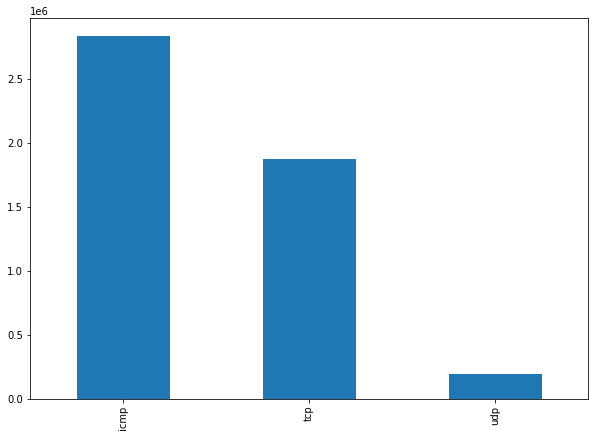

In [34]:
plt.figure(figsize=(10,7))
plot_bar_graph('protocol_type')

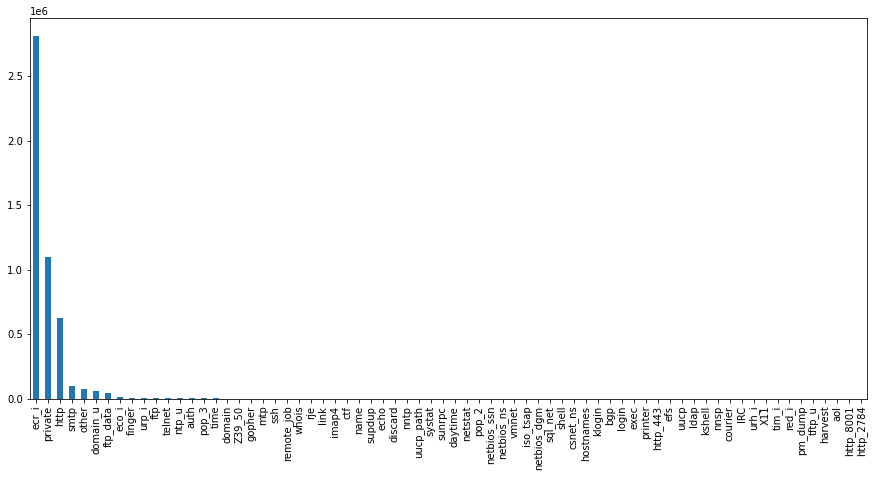

In [36]:
plt.figure(figsize=(15,7))
plot_bar_graph('service')

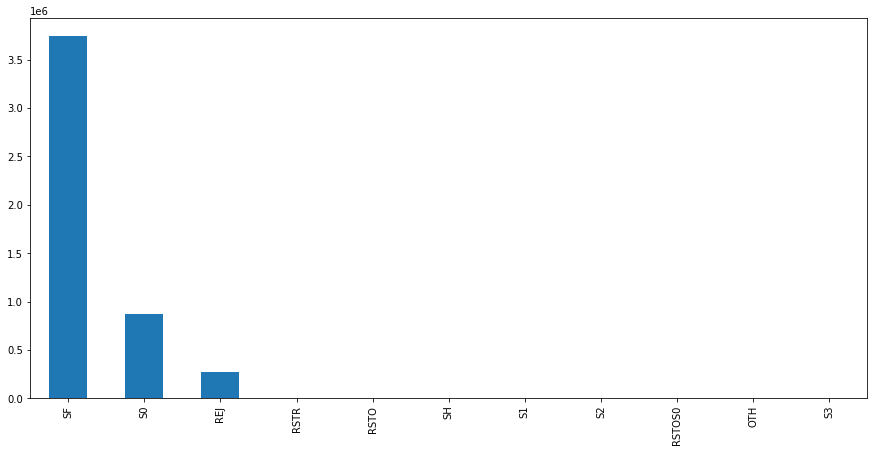

In [37]:
plt.figure(figsize=(15,7))
plot_bar_graph('flag')

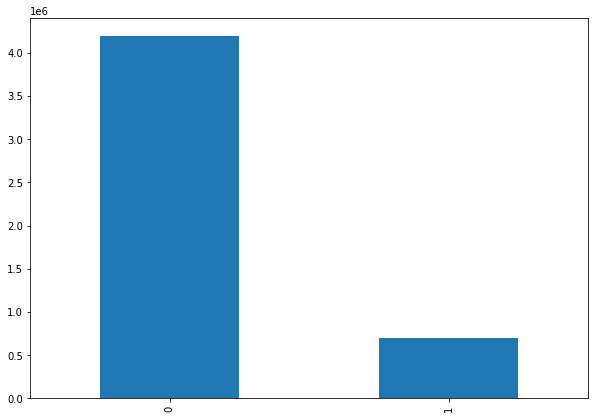

In [38]:
plt.figure(figsize=(10,7))
plot_bar_graph('logged_in')

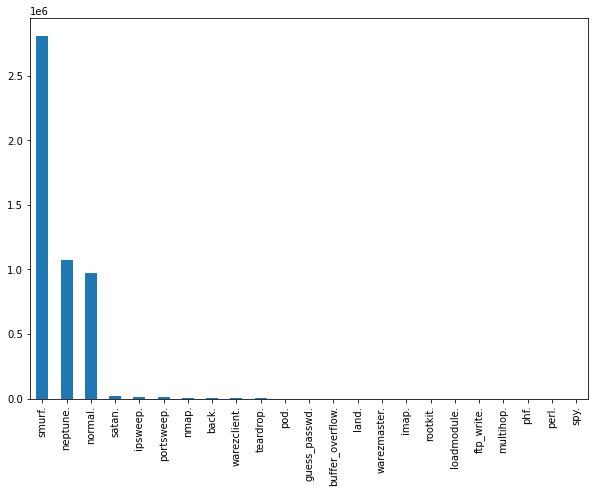

In [39]:
# target distributions
plt.figure(figsize=(10,7))
plot_bar_graph('target')

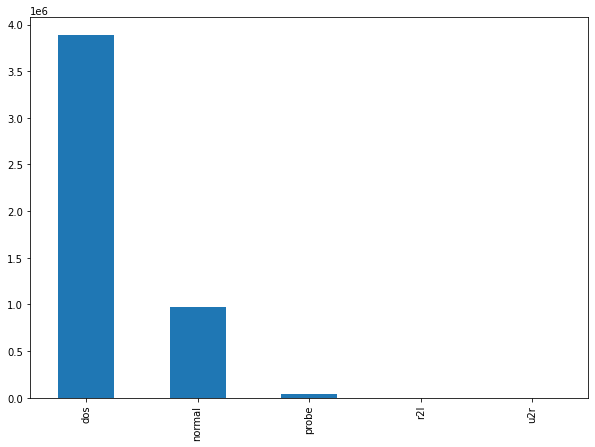

In [40]:
plt.figure(figsize=(10,7))
plot_bar_graph('Attack Type')

C:\Users\Vlad\AppData\Local\Temp/ipykernel_20892/255951544.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df_train = df_train.dropna('columns')# drop columns with NaN


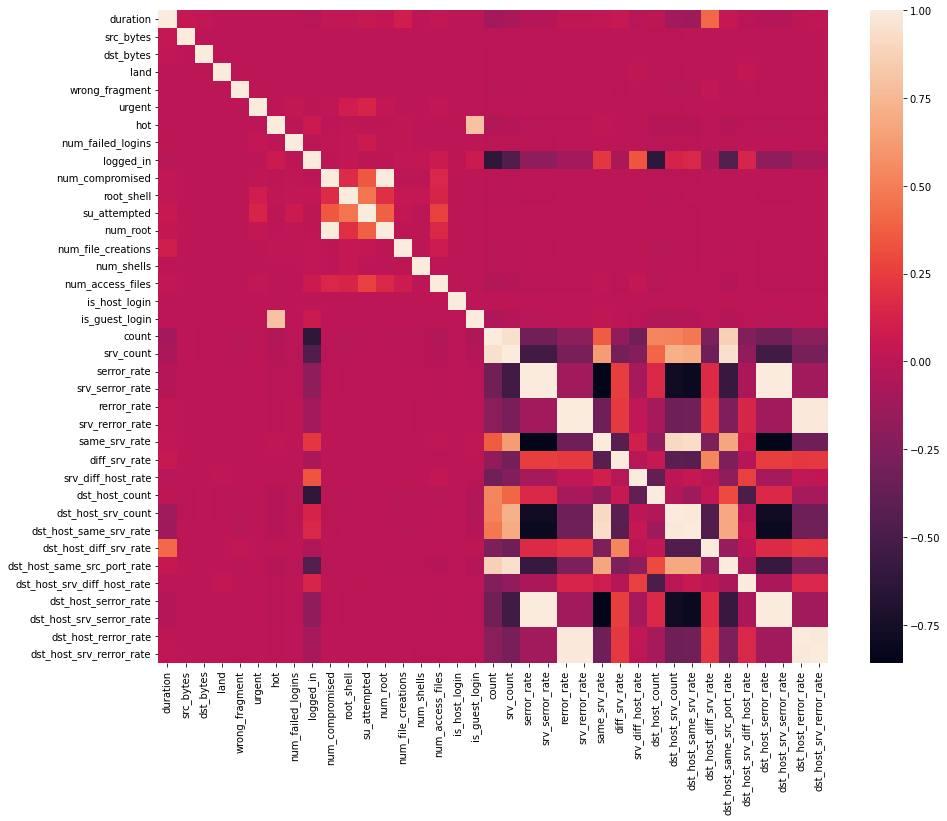

In [42]:
# correlation


df_train = df_train.dropna('columns')# drop columns with NaN

df_train = df_train[[col for col in df_train if df_train[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df_train.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()



In [44]:
print(f"""Correlations:
num_root to num_compromised: {df_train['num_root'].corr(df_train['num_compromised'])}
srv_serror_rate to serror_rate: {df_train['srv_serror_rate'].corr(df_train['serror_rate'])}
srv_count to count: {df_train['srv_count'].corr(df_train['count'])}
srv_rerror_rate to rerror_rate: {df_train['srv_rerror_rate'].corr(df_train['rerror_rate'])}
dst_host_same_srv_rate to dst_host_srv_count: {df_train['dst_host_same_srv_rate'].corr(df_train['dst_host_srv_count'])}
dst_host_srv_serror_rate to dst_host_serror_rate: {df_train['dst_host_srv_serror_rate'].corr(df_train['dst_host_serror_rate'])}
dst_host_srv_rerror_rate to dst_host_rerror_rate: {df_train['dst_host_srv_rerror_rate'].corr(df_train['dst_host_rerror_rate'])}
dst_host_same_srv_rate to same_srv_rate: {df_train['dst_host_same_srv_rate'].corr(df_train['same_srv_rate'])}
dst_host_srv_count to same_srv_rate: {df_train['dst_host_srv_count'].corr(df_train['same_srv_rate'])}
dst_host_same_src_port_rate to srv_count: {df_train['dst_host_same_src_port_rate'].corr(df_train['srv_count'])}
dst_host_serror_rate to serror_rate: {df_train['dst_host_serror_rate'].corr(df_train['serror_rate'])}
dst_host_serror_rate to srv_serror_rate: {df_train['dst_host_serror_rate'].corr(df_train['srv_serror_rate'])}
dst_host_srv_serror_rate to serror_rate: {df_train['dst_host_srv_serror_rate'].corr(df_train['serror_rate'])}
dst_host_srv_serror_rate to srv_serror_rate: {df_train['dst_host_srv_serror_rate'].corr(df_train['srv_serror_rate'])}
dst_host_rerror_rate to rerror_rate: {df_train['dst_host_rerror_rate'].corr(df_train['rerror_rate'])}
dst_host_rerror_rate to srv_rerror_rate: {df_train['dst_host_rerror_rate'].corr(df_train['srv_rerror_rate'])}
dst_host_srv_rerror_rate to rerror_rate: {df_train['dst_host_srv_rerror_rate'].corr(df_train['rerror_rate'])}
dst_host_srv_rerror_rate to srv_rerror_rate: {df_train['dst_host_srv_rerror_rate'].corr(df_train['srv_rerror_rate'])}
""")

Correlations:
num_root to num_compromised: 0.9975798933487737
srv_serror_rate to serror_rate: 0.9986924138664222
srv_count to count: 0.9433902218808042
srv_rerror_rate to rerror_rate: 0.9953719458068703
dst_host_same_srv_rate to dst_host_srv_count: 0.9788464524225914
dst_host_srv_serror_rate to dst_host_serror_rate: 0.998285955975919
dst_host_srv_rerror_rate to dst_host_rerror_rate: 0.9869790678086942
dst_host_same_srv_rate to same_srv_rate: 0.9316213679073936
dst_host_srv_count to same_srv_rate: 0.9075289446662882
dst_host_same_src_port_rate to srv_count: 0.9473596471554561
dst_host_serror_rate to serror_rate: 0.9990059376728406
dst_host_serror_rate to srv_serror_rate: 0.9979417182527545
dst_host_srv_serror_rate to serror_rate: 0.9982509415923287
dst_host_srv_serror_rate to srv_serror_rate: 0.9993917300385466
dst_host_rerror_rate to rerror_rate: 0.9897555886509829
dst_host_rerror_rate to srv_rerror_rate: 0.9855530624565976
dst_host_srv_rerror_rate to rerror_rate: 0.9859781723139902
ds

In [45]:
#highly correlated with num_compromised, should be ignored in analysis
df_train.drop('num_root',axis = 1,inplace = True)

#highly correlated with serror_rate, should be ignored in analysis
df_train.drop('srv_serror_rate',axis = 1,inplace = True)

#highly correlated with rerror_rate, should be ignored in analysis
df_train.drop('srv_rerror_rate',axis = 1, inplace=True)

#highly correlated with srv_serror_rate, should be ignored in analysis
df_train.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#highly correlated with rerror_rate, should be ignored in analysis
df_train.drop('dst_host_serror_rate',axis = 1, inplace=True)

#highly correlated with srv_rerror_rate, should be ignored in analysis
df_train.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#highly correlated with rerror_rate, should be ignored in analysis
df_train.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#highly correlated with dst_host_srv_count, should be ignored in analysis
df_train.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

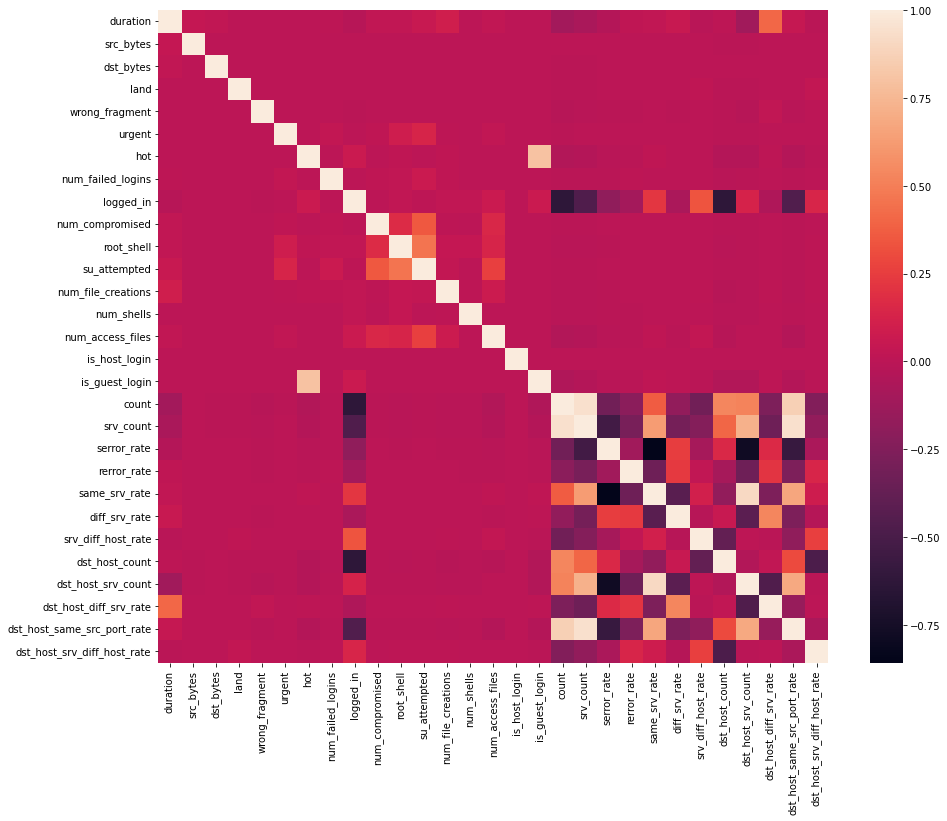

In [46]:
df_train = df_train[[col for col in df_train if df_train[col].nunique() > 1]]# keep columns where there are more than 1 unique values
corr = df_train.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.show()



In [47]:
# encoding of features
pmap = {'icmp':0,'tcp':1,'udp':2}
df_train['protocol_type'] = df_train['protocol_type'].map(pmap)

fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df_train['flag'] = df_train['flag'].map(fmap)

In [48]:
df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,215,45076,0,0,0,0,...,1.0,0.0,0.00,0,0,0.0,0.00,0.00,normal.,normal
1,0,1,http,0,162,4528,0,0,0,0,...,1.0,0.0,0.00,1,1,0.0,1.00,0.00,normal.,normal
2,0,1,http,0,236,1228,0,0,0,0,...,1.0,0.0,0.00,2,2,0.0,0.50,0.00,normal.,normal
3,0,1,http,0,233,2032,0,0,0,0,...,1.0,0.0,0.00,3,3,0.0,0.33,0.00,normal.,normal
4,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.00,4,4,0.0,0.25,0.00,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,1,http,0,212,2288,0,0,0,0,...,1.0,0.0,0.16,3,255,0.0,0.33,0.05,normal.,normal
4898427,0,1,http,0,219,236,0,0,0,0,...,1.0,0.0,0.15,4,255,0.0,0.25,0.05,normal.,normal
4898428,0,1,http,0,218,3610,0,0,0,0,...,1.0,0.0,0.15,5,255,0.0,0.20,0.05,normal.,normal
4898429,0,1,http,0,219,1234,0,0,0,0,...,1.0,0.0,0.14,6,255,0.0,0.17,0.05,normal.,normal
